# Support Vector Identification
## The Story Behind This Notebook

When I was learning the theory of Support Vector Machines (SVM) from the awesome book titled 'An Introduction to Statistical Learning with Applications in R' of James, Witten, Hastie and Tibshirani (which is made freely available by the authors, hint: just google it), I had to disagree with the authors on a simple case of counting.

In one of the figures (the bottom right one on page 348), the authors say that there are eight support vectors and I counted nine! (I am including the figure here for quick reference). As a result, I simulated some data, fitted SVMs, and identified the support vectors to check my undestanding of the concept.


## 8 Support Vectors or 9?

By my count there are 5 blue support vectors and 4 pink.

![alt text](svm.png "8 or 9")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('numpy version: ',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version: ',sns.__version__)

numpy version:  1.16.5
pandas version:  0.25.1
seaborn version:  0.9.0


## Separated Case (so we can have hard margins)

In [2]:
#generating cluster 0
np.random.seed(seed=2019)
cluster0 = np.random.multivariate_normal(mean=[1, 1], cov=[[1, 0], [0, 1]], size=300)

#generating cluster 1
np.random.seed(seed=2020)
cluster1 = np.random.multivariate_normal(mean=[8, 7], cov=[[3, 0], [0, 3]], size=300)

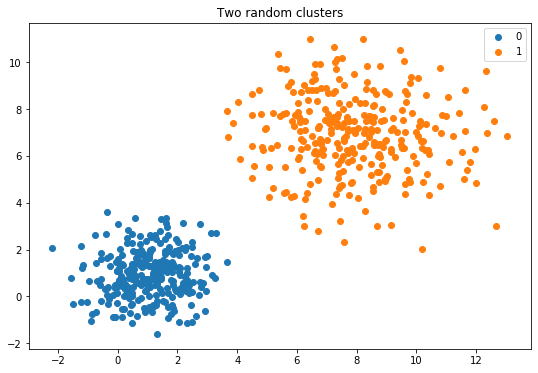

In [3]:
plt.figure(figsize=(9, 6))
plt.scatter(cluster0[:, 0], cluster0[:, 1], label='0')
plt.scatter(cluster1[:, 0], cluster1[:, 1], label='1')
plt.title('Two random clusters')
plt.legend()
plt.show()

In [4]:
df0 = pd.DataFrame(cluster0, columns=['x1', 'x2'])
df0['y'] = np.repeat(0, repeats=300)
df1 = pd.DataFrame(cluster1, columns=['x1', 'x2'])
df1['y'] = np.repeat(1, repeats=300)
df = pd.concat([df0, df1])

X = df[['x1', 'x2']]
y = df['y']

### Logistic Regression

Logistic Regression is here for comparison purposes (sanity check). It is well known that Logistic Regression and SVM will produce similar results due to the fact that their loss functions are very similar (hinge-loss for SVM and log-loss for LR).

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs')
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

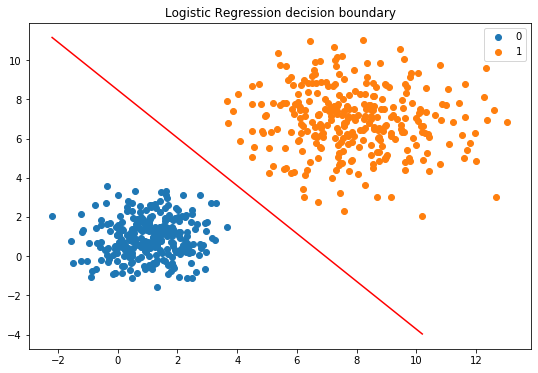

In [6]:
xa = -2.2
xb = 10.2
ya = -xa * lr.coef_[0, 0] / lr.coef_[0, 1] - lr.intercept_[0] / lr.coef_[0, 1]
yb = -xb * lr.coef_[0, 0] / lr.coef_[0, 1] - lr.intercept_[0] / lr.coef_[0, 1]

plt.figure(figsize=(9, 6))
plt.scatter(cluster0[:, 0], cluster0[:, 1], label='0')
plt.scatter(cluster1[:, 0], cluster1[:, 1], label='1')
plt.plot([xa, xb], [ya, yb], color='red')
plt.title('Logistic Regression decision boundary')
plt.legend()
plt.show()

### SVM (support vectors will be denoted by purple stars)

In [7]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1.0)
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

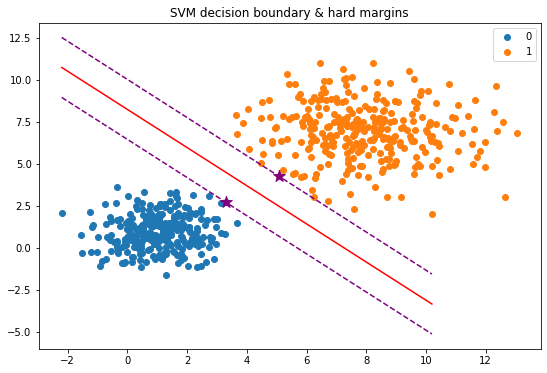

In [8]:
# decision boundary
xa = -2.2
xb = 10.2
ya = -xa * svc.coef_[0, 0] / svc.coef_[0, 1] - svc.intercept_[0] / svc.coef_[0, 1]
yb = -xb * svc.coef_[0, 0] / svc.coef_[0, 1] - svc.intercept_[0] / svc.coef_[0, 1]

#margins
za = (1 - svc.intercept_[0]) / svc.coef_[0, 1] - xa * svc.coef_[0, 0] / svc.coef_[0, 1]
zb = (1 - svc.intercept_[0]) / svc.coef_[0, 1] - xb * svc.coef_[0, 0] / svc.coef_[0, 1]

wa = (-1 - svc.intercept_[0]) / svc.coef_[0, 1] - xa * svc.coef_[0, 0] / svc.coef_[0, 1]
wb = (-1 - svc.intercept_[0]) / svc.coef_[0, 1] - xb * svc.coef_[0, 0] / svc.coef_[0, 1]

plt.figure(figsize=(9, 6))
plt.scatter(cluster0[:, 0], cluster0[:, 1], label='0')
plt.scatter(cluster1[:, 0], cluster1[:, 1], label='1')
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], 
            color='purple', s=150, marker='*')
plt.plot([xa, xb], [ya, yb], color='red')
plt.plot([xa, xb], [za, zb], color='purple', linestyle='--')
plt.plot([xa, xb], [wa, wb], color='purple', linestyle='--')
plt.title('SVM decision boundary & hard margins')
plt.legend()
plt.show()

### SVM with increased margin
### (support vectors will be denoted by purple stars)

In [9]:
# C is decreased to increase margins (hence they become soft margins)
svc = SVC(kernel='linear', C=0.1)
svc.fit(X, y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

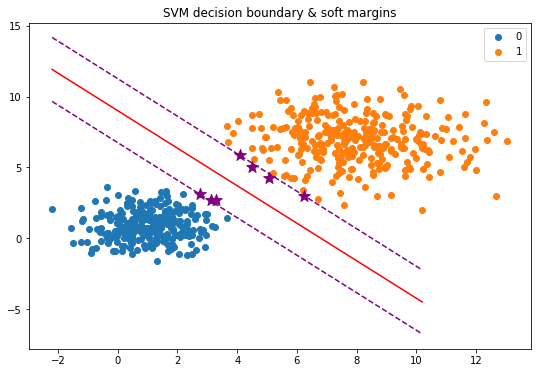

In [10]:
xa = -2.2
xb = 10.2
ya = -xa * svc.coef_[0, 0] / svc.coef_[0, 1] - svc.intercept_[0] / svc.coef_[0, 1]
yb = -xb * svc.coef_[0, 0] / svc.coef_[0, 1] - svc.intercept_[0] / svc.coef_[0, 1]

#margins
za = (1 - svc.intercept_[0]) / svc.coef_[0, 1] - xa * svc.coef_[0, 0] / svc.coef_[0, 1]
zb = (1 - svc.intercept_[0]) / svc.coef_[0, 1] - xb * svc.coef_[0, 0] / svc.coef_[0, 1]

wa = (-1 - svc.intercept_[0]) / svc.coef_[0, 1] - xa * svc.coef_[0, 0] / svc.coef_[0, 1]
wb = (-1 - svc.intercept_[0]) / svc.coef_[0, 1] - xb * svc.coef_[0, 0] / svc.coef_[0, 1]

plt.figure(figsize=(9, 6))
plt.scatter(cluster0[:, 0], cluster0[:, 1], label='0')
plt.scatter(cluster1[:, 0], cluster1[:, 1], label='1')
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], 
            color='purple', s=150, marker='*')
plt.plot([xa, xb], [ya, yb], color='red')
plt.plot([xa, xb], [za, zb], color='purple', linestyle='--')
plt.plot([xa, xb], [wa, wb], color='purple', linestyle='--')
plt.title('SVM decision boundary & soft margins')
plt.legend()
plt.show()

## Inseparable Case (so we are forced to have soft margins)

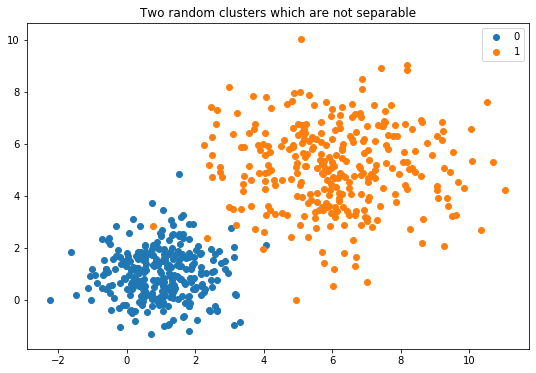

In [11]:
#generating cluster 0
np.random.seed(seed=42)
cluster0 = np.random.multivariate_normal(mean=[1, 1], cov=[[1, 0], [0, 1]], size=300)

#generating cluster 1
np.random.seed(seed=43)
cluster1 = np.random.multivariate_normal(mean=[6, 5], cov=[[3, 0], [0, 3]], size=300)

plt.figure(figsize=(9, 6))
plt.scatter(cluster0[:, 0], cluster0[:, 1], label='0')
plt.scatter(cluster1[:, 0], cluster1[:, 1], label='1')
plt.title('Two random clusters which are not separable')
plt.legend()
plt.show()

In [12]:
df0 = pd.DataFrame(cluster0, columns=['x1', 'x2'])
df0['y'] = np.repeat(0, repeats=300)
df1 = pd.DataFrame(cluster1, columns=['x1', 'x2'])
df1['y'] = np.repeat(1, repeats=300)
df = pd.concat([df0, df1])

X = df[['x1', 'x2']]
y = df['y']

### Logistic Regression

In [13]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

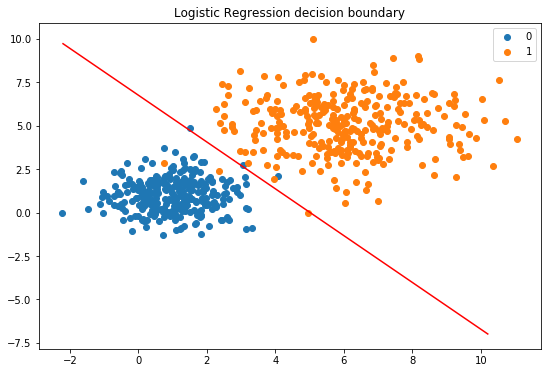

In [14]:
xa = -2.2
xb = 10.2
ya = -xa * lr.coef_[0, 0] / lr.coef_[0, 1] - lr.intercept_[0] / lr.coef_[0, 1]
yb = -xb * lr.coef_[0, 0] / lr.coef_[0, 1] - lr.intercept_[0] / lr.coef_[0, 1]

plt.figure(figsize=(9, 6))
plt.scatter(cluster0[:, 0], cluster0[:, 1], label='0')
plt.scatter(cluster1[:, 0], cluster1[:, 1], label='1')
plt.plot([xa, xb], [ya, yb], color='red')
plt.title('Logistic Regression decision boundary')
plt.legend()
plt.show()

### SVM (support vectors will be denoted by purple stars)

In [15]:
svc = SVC(kernel='linear', C=1.0)
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

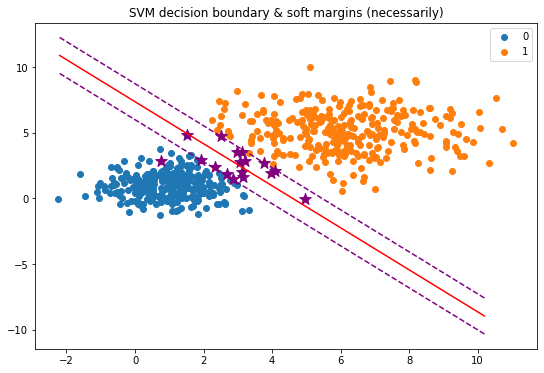

In [16]:
xa = -2.2
xb = 10.2
ya = -xa * svc.coef_[0, 0] / svc.coef_[0, 1] - svc.intercept_[0] / svc.coef_[0, 1]
yb = -xb * svc.coef_[0, 0] / svc.coef_[0, 1] - svc.intercept_[0] / svc.coef_[0, 1]

#margins
za = (1 - svc.intercept_[0]) / svc.coef_[0, 1] - xa * svc.coef_[0, 0] / svc.coef_[0, 1]
zb = (1 - svc.intercept_[0]) / svc.coef_[0, 1] - xb * svc.coef_[0, 0] / svc.coef_[0, 1]

wa = (-1 - svc.intercept_[0]) / svc.coef_[0, 1] - xa * svc.coef_[0, 0] / svc.coef_[0, 1]
wb = (-1 - svc.intercept_[0]) / svc.coef_[0, 1] - xb * svc.coef_[0, 0] / svc.coef_[0, 1]

plt.figure(figsize=(9, 6))
plt.scatter(cluster0[:, 0], cluster0[:, 1], label='0')
plt.scatter(cluster1[:, 0], cluster1[:, 1], label='1')
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], 
            color='purple', s=150, marker='*')
plt.plot([xa, xb], [ya, yb], color='red')
plt.plot([xa, xb], [za, zb], color='purple', linestyle='--')
plt.plot([xa, xb], [wa, wb], color='purple', linestyle='--')
plt.title('SVM decision boundary & soft margins (necessarily)')
plt.legend()
plt.show()

### SVM with increased margins
### (support vectors will be denoted by purple stars)

In [17]:
svc = SVC(kernel='linear', C=0.1)
svc.fit(X, y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

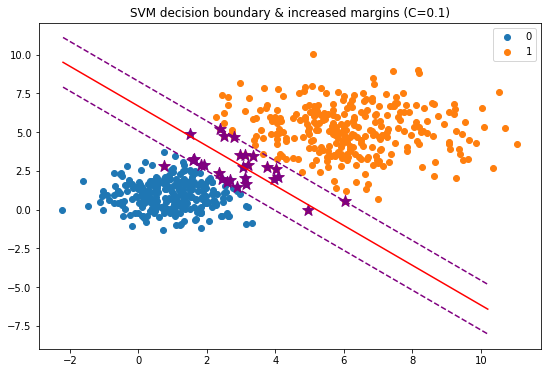

In [18]:
xa = -2.2
xb = 10.2
ya = -xa * svc.coef_[0, 0] / svc.coef_[0, 1] - svc.intercept_[0] / svc.coef_[0, 1]
yb = -xb * svc.coef_[0, 0] / svc.coef_[0, 1] - svc.intercept_[0] / svc.coef_[0, 1]

#margins
za = (1 - svc.intercept_[0]) / svc.coef_[0, 1] - xa * svc.coef_[0, 0] / svc.coef_[0, 1]
zb = (1 - svc.intercept_[0]) / svc.coef_[0, 1] - xb * svc.coef_[0, 0] / svc.coef_[0, 1]

wa = (-1 - svc.intercept_[0]) / svc.coef_[0, 1] - xa * svc.coef_[0, 0] / svc.coef_[0, 1]
wb = (-1 - svc.intercept_[0]) / svc.coef_[0, 1] - xb * svc.coef_[0, 0] / svc.coef_[0, 1]

plt.figure(figsize=(9, 6))
plt.scatter(cluster0[:, 0], cluster0[:, 1], label='0')
plt.scatter(cluster1[:, 0], cluster1[:, 1], label='1')
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], 
            color='purple', s=150, marker='*')
plt.plot([xa, xb], [ya, yb], color='red')
plt.plot([xa, xb], [za, zb], color='purple', linestyle='--')
plt.plot([xa, xb], [wa, wb], color='purple', linestyle='--')
plt.title('SVM decision boundary & increased margins (C=0.1)')
plt.legend()
plt.show()

In [19]:
svc = SVC(kernel='linear', C=0.01)
svc.fit(X, y)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

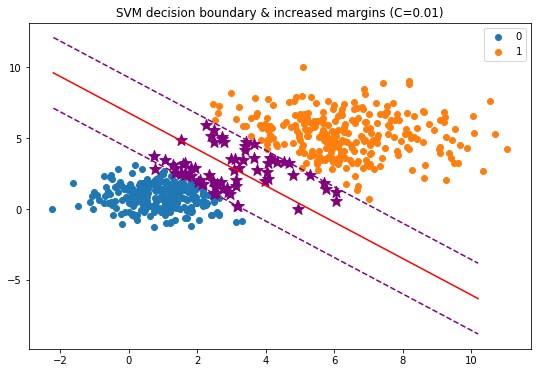

In [20]:
xa = -2.2
xb = 10.2
ya = -xa * svc.coef_[0, 0] / svc.coef_[0, 1] - svc.intercept_[0] / svc.coef_[0, 1]
yb = -xb * svc.coef_[0, 0] / svc.coef_[0, 1] - svc.intercept_[0] / svc.coef_[0, 1]

#margins
za = (1 - svc.intercept_[0]) / svc.coef_[0, 1] - xa * svc.coef_[0, 0] / svc.coef_[0, 1]
zb = (1 - svc.intercept_[0]) / svc.coef_[0, 1] - xb * svc.coef_[0, 0] / svc.coef_[0, 1]

wa = (-1 - svc.intercept_[0]) / svc.coef_[0, 1] - xa * svc.coef_[0, 0] / svc.coef_[0, 1]
wb = (-1 - svc.intercept_[0]) / svc.coef_[0, 1] - xb * svc.coef_[0, 0] / svc.coef_[0, 1]

plt.figure(figsize=(9, 6))
plt.scatter(cluster0[:, 0], cluster0[:, 1], label='0')
plt.scatter(cluster1[:, 0], cluster1[:, 1], label='1')
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], 
            color='purple', s=150, marker='*')
plt.plot([xa, xb], [ya, yb], color='red')
plt.plot([xa, xb], [za, zb], color='purple', linestyle='--')
plt.plot([xa, xb], [wa, wb], color='purple', linestyle='--')
plt.title('SVM decision boundary & increased margins (C=0.01)')
plt.legend()
plt.show()